<img src="https://miro.medium.com/max/647/1*ZOcUPrSXLYucFxppoI-dYg.png">

# Problem definition


For this project we are using a car dataset, where we want to predict the selling price of car based on its certain features.
Since we need to find the real value, with real calculation, therefore this problem is regression problem. 
We will be using linear regression to solve this problem.

General equation of Multiple Linear Regression:
$$y = \beta_0 + \beta_{1}x_1 + \beta_{2}x_2 + \beta_{3}x_3 + \beta_{4}x_4 + ... + \beta_{n}x_n$$

# Libraries

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)

# Data Gathering

In [41]:
df = pd.read_csv("car_dataset.csv")

In [42]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


# Data Preparation

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [44]:
df.shape

(301, 9)

In [45]:
df.describe()
# There is possibility to present outlier problem,because std dev of present price,kms_driven and owner is bigger than mean values.

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


<AxesSubplot:>

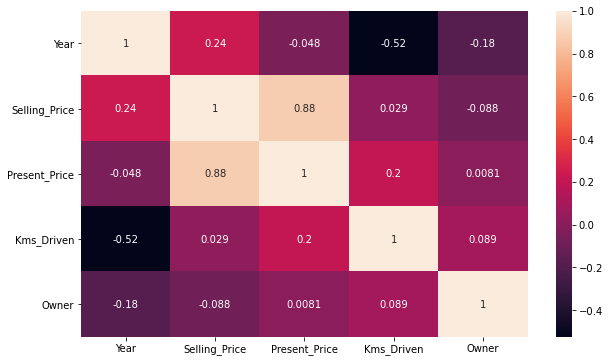

In [46]:
sns.heatmap(df.corr(),annot=True)

In [47]:
df.Transmission.value_counts(dropna=False)

Manual       261
Automatic     40
Name: Transmission, dtype: int64

# Feature Engineering

<ul>Fuel_Type feature:
    <li>Fuel is Petrol if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 1</li>
    <li>Fuel is Diesel if Fuel_type_diesel = 1 ,Fuel_Type_Petrol = 0</li>
    <li>Fuel is cng if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 0</li>
   </ul>
<ul>Transmission feature:
    <li>transmission is manual if Transmission_Manual = 1</li> 
    <li>transmission is automatic if Transmission_Manual = 0</li></ul>
<ul>Seller_Type feature:
    <li>Seller_Type is Individual if Seller_Type_Individual = 1 </li> 
    <li>Seller_Type is dealer if Seller_Type_Individual = 0</li> </ul>
    


In [48]:
pd.get_dummies(df.Fuel_Type)

,CNG,Diesel,Petrol
0,0,0,1
1,0,1,0
2,0,0,1
3,0,0,1
4,0,1,0
...,...,...,...
296,0,1,0
297,0,0,1
298,0,0,1
299,0,1,0


In [49]:
df.Transmission.value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [50]:
df_deneme=df.copy()

In [51]:
df.Seller_Type.value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [52]:
df["Owner"].unique()

array([0, 1, 3], dtype=int64)

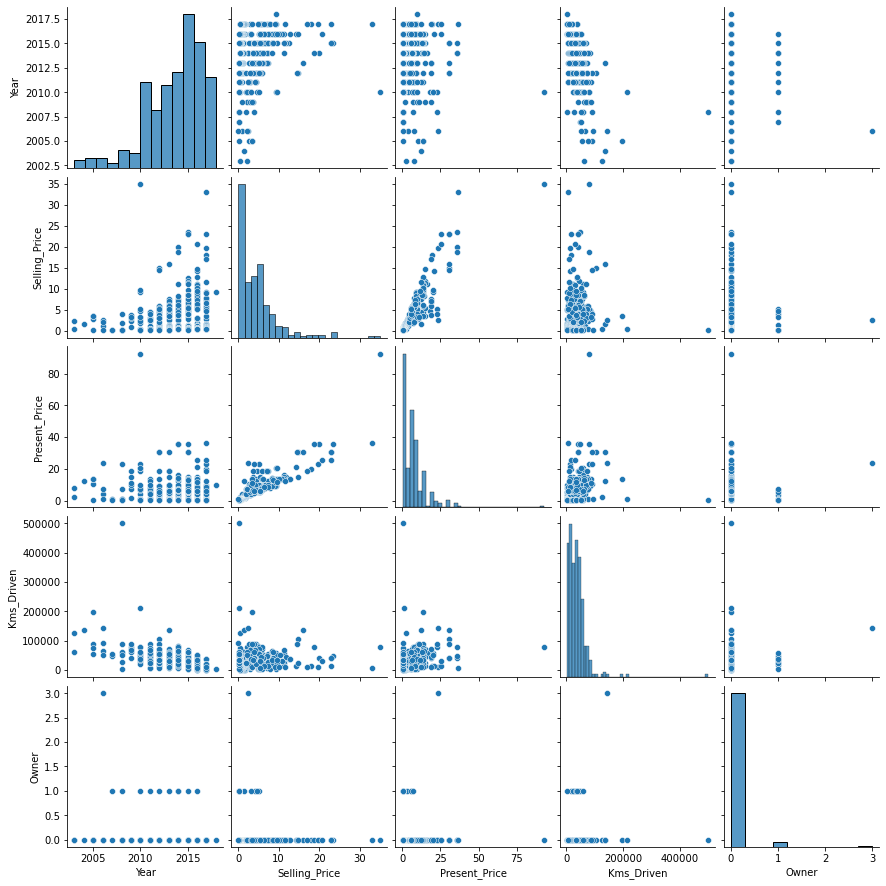

In [53]:
sns.pairplot(df);

In [54]:
df["Car_Name"].value_counts(dropna=False)

city                   26
corolla altis          16
verna                  14
fortuner               11
brio                   10
                       ..
Mahindra Mojo XT300     1
Bajaj Discover 100      1
Bajaj Avenger 150       1
Bajaj Dominar 400       1
800                     1
Name: Car_Name, Length: 98, dtype: int64

In [55]:
df.Car_Name.unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [56]:
df = df.drop("Car_Name", axis=1)
# 98 car names do not affect the selling price.

# Transmission

In [57]:
df.Transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [58]:
df.Transmission = df.Transmission.apply(lambda x: 0 if x=="Automatic" else 1)

In [59]:
df.head(2)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,1,0
1,2013,4.75,9.54,43000,Diesel,Dealer,1,0


In [60]:
df = pd.concat([df, pd.get_dummies(df.Fuel_Type)], axis=1)

In [61]:
df.head(2)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,CNG,Diesel,Petrol
0,2014,3.35,5.59,27000,Petrol,Dealer,1,0,0,0,1
1,2013,4.75,9.54,43000,Diesel,Dealer,1,0,0,1,0


In [62]:
df.drop("Fuel_Type",axis=1,inplace=True)

In [63]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner,CNG,Diesel,Petrol
0,2014,3.35,5.59,27000,Dealer,1,0,0,0,1
1,2013,4.75,9.54,43000,Dealer,1,0,0,1,0
2,2017,7.25,9.85,6900,Dealer,1,0,0,0,1
3,2011,2.85,4.15,5200,Dealer,1,0,0,0,1
4,2014,4.60,6.87,42450,Dealer,1,0,0,1,0


In [78]:
df.Seller_Type = df.Seller_Type.map(lambda x: 0 if x=="Dealer" else 1)

In [79]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner,CNG,Diesel,Petrol
0,2014,3.35,5.59,27000,1,1,0,0,0,1
1,2013,4.75,9.54,43000,1,1,0,0,1,0
2,2017,7.25,9.85,6900,1,1,0,0,0,1
3,2011,2.85,4.15,5200,1,1,0,0,0,1
4,2014,4.60,6.87,42450,1,1,0,0,1,0


### Features and target variable

In [80]:
X = df.drop("Selling_Price", axis=True)

In [81]:
y = df.Selling_Price

### Splitting data into training and testing

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42)

In [84]:
df.sample(15)

,Year,Selling_Price,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner,CNG,Diesel,Petrol
286,2016,5.65,7.90,28569,1,1,0,0,0,1
256,2016,10.25,13.60,49562,1,1,0,0,0,1
72,2013,7.45,18.61,56001,1,1,0,0,0,1
236,2016,3.10,4.43,11849,1,1,0,0,0,1
292,2016,6.40,8.40,12000,1,1,0,0,0,1
80,2016,14.73,14.89,23000,1,1,0,0,1,0
7,2015,6.50,8.61,33429,1,1,0,0,1,0
203,2011,2.95,4.60,53460,1,1,0,0,0,1
94,2008,4.00,22.78,89000,1,0,0,0,0,1
109,2017,1.20,1.47,11000,1,1,0,0,0,1


In [85]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (210, 9)
Train target shape   :  (210,)
Test features shape  :  (91, 9)
Test target shape    :  (91,)


##  Model Building (Linear Regression)

In [86]:
from sklearn.linear_model import LinearRegression

In [87]:
lm = LinearRegression()

In [88]:
lm.fit(X_train, y_train)

LinearRegression()

In [89]:
y_pred = lm.predict(X_test)

In [90]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

def eval_metrics(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [91]:
y_train_pred = lm.predict(X_train)

In [92]:
y_pred = lm.predict(X_test)

In [94]:
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.873900914422904
MAE 		: 1.2291698862994733
MSE 		: 3.0948039801266365
RMSE 		: 1.7592054968441397


In [93]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8706068053477252
MAE 		: 1.3723475088586075
MSE 		: 3.684367778169292
RMSE 		: 1.9194707026076985


In [95]:
lm_scores = {"lm_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "lm_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
ls =pd.DataFrame(lm_scores)
ls

,lm_train,lm_test
rmse,1.759205,1.919471
mae,1.229170,1.372348
mse,3.094804,3.684368
R2,0.873901,0.870607


# Model Evaluation

In [97]:
my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test-y_pred}
compare = pd.DataFrame(my_dict)
compare.head(10)

,Actual,pred,residual
177,0.35,3.227159,-2.877159
289,10.11,7.832760,2.277240
228,4.95,6.398750,-1.448750
198,0.15,-1.174984,1.324984
60,6.95,8.785549,-1.835549
9,7.45,7.413215,0.036785
118,1.10,2.003199,-0.903199
154,0.50,1.424039,-0.924039
164,0.45,2.023088,-1.573088
33,6.00,7.473796,-1.473796


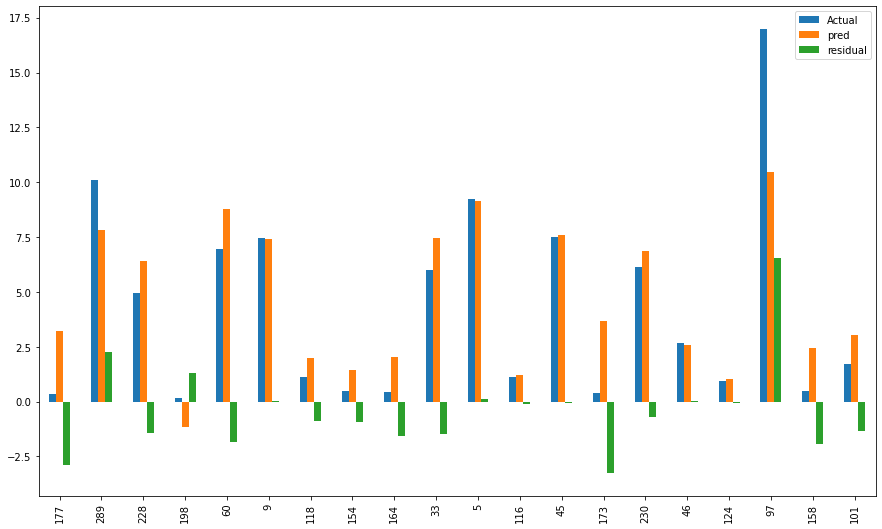

In [98]:
compare.head(20).plot(kind='bar',figsize=(15,9));

# Ridge

In [99]:
from sklearn.linear_model import RidgeCV

In [100]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [101]:
ridge_cv_model = RidgeCV(alphas = alpha_space, cv = 10, scoring = "neg_root_mean_squared_error")

In [102]:
ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=10, scoring='neg_root_mean_squared_error')

In [103]:
ridge_cv_model.alpha_

1.0

In [104]:
y_pred = ridge_cv_model.predict(X_test)

In [105]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8709668340599305
MAE 		: 1.366711349614127
MSE 		: 3.6741162484035295
RMSE 		: 1.9167984370829212


In [106]:
ridge_cv_scores = {"ridge_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "ridge_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
rcs = pd.DataFrame(ridge_cv_scores)
rcs

,ridge_cv_train,ridge_cv_test
rmse,1.759205,1.916798
mae,1.229170,1.366711
mse,3.094804,3.674116
R2,0.873901,0.870967


In [107]:
pd.concat([ls, rcs], axis = 1)

,lm_train,lm_test,ridge_cv_train,ridge_cv_test
rmse,1.759205,1.919471,1.759205,1.916798
mae,1.229170,1.372348,1.229170,1.366711
mse,3.094804,3.684368,3.094804,3.674116
R2,0.873901,0.870607,0.873901,0.870967


# Lasso

In [108]:
from sklearn.linear_model import Lasso, LassoCV

In [109]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 10, max_iter = 100000)

In [110]:
lasso_cv_model.fit(X_train, y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=10, max_iter=100000)

In [111]:
lasso_cv_model.alpha_

0.01

In [112]:
y_train_pred = lasso_cv_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8737360141699244
MAE 		: 1.2220496205896891
MSE 		: 3.0988510670417346
RMSE 		: 1.760355380893794


In [113]:
lasso_cv_scores = {"lasso_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "lasso_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
lcs = pd.DataFrame(lasso_cv_scores)
lcs

,lasso_cv_train,lasso_cv_test
rmse,1.760355,1.916798
mae,1.222050,1.366711
mse,3.098851,3.674116
R2,0.873736,0.870967


In [114]:
pd.concat([ls, rcs, lcs], axis = 1)

,lm_train,lm_test,ridge_cv_train,ridge_cv_test,lasso_cv_train,lasso_cv_test
rmse,1.759205,1.919471,1.759205,1.916798,1.760355,1.916798
mae,1.229170,1.372348,1.229170,1.366711,1.222050,1.366711
mse,3.094804,3.684368,3.094804,3.674116,3.098851,3.674116
R2,0.873901,0.870607,0.873901,0.870967,0.873736,0.870967


## Elastic-Net 

In [115]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [116]:
elastic_model = ElasticNet()
elastic_model.fit(X_train, y_train)

ElasticNet()

In [117]:
elastic_model.l1_ratio

0.5

In [118]:
elastic_model.alpha

1.0

In [119]:
y_pred = elastic_model.predict(X_test)
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8460244412267115
MAE 		: 1.4321927972513324
MSE 		: 4.384330944872787
RMSE 		: 2.093879400747041


In [120]:
elastic_scores = {"elastic_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "elastic_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
es = pd.DataFrame(elastic_scores)
es

,elastic_train,elastic_test
rmse,1.760355,2.093879
mae,1.222050,1.432193
mse,3.098851,4.384331
R2,0.873736,0.846024


In [121]:
pd.concat([ls, rcs, lcs, es], axis = 1)

,lm_train,lm_test,ridge_cv_train,ridge_cv_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test
rmse,1.759205,1.919471,1.759205,1.916798,1.760355,1.916798,1.760355,2.093879
mae,1.229170,1.372348,1.229170,1.366711,1.222050,1.366711,1.222050,1.432193
mse,3.094804,3.684368,3.094804,3.674116,3.098851,3.674116,3.098851,4.384331
R2,0.873901,0.870607,0.873901,0.870967,0.873736,0.870967,0.873736,0.846024


In [123]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space, l1_ratio=[0.1, 0.5, 0.7,0.9, 0.95, 1], cv = 10, max_iter = 100000)

In [124]:
elastic_cv_model.fit(X_train, y_train)

ElasticNetCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
             cv=10, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=100000)

In [125]:
elastic_cv_model.alpha_

0.01

In [126]:
elastic_cv_model.l1_ratio_

0.1

In [127]:
y_train_pred = elastic_cv_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8736133848647587
MAE 		: 1.2229316729651665
MSE 		: 3.101860713463595
RMSE 		: 1.7612100140141138


In [128]:
elastic_cv_scores = {"elastic_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "elastic_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
ecs = pd.DataFrame(elastic_cv_scores)
ecs

,elastic_cv_train,elastic_cv_test
rmse,1.761210,2.093879
mae,1.222932,1.432193
mse,3.101861,4.384331
R2,0.873613,0.846024


In [129]:
pd.concat([ls, rcs, lcs, ecs], axis = 1)

,lm_train,lm_test,ridge_cv_train,ridge_cv_test,lasso_cv_train,lasso_cv_test,elastic_cv_train,elastic_cv_test
rmse,1.759205,1.919471,1.759205,1.916798,1.760355,1.916798,1.761210,2.093879
mae,1.229170,1.372348,1.229170,1.366711,1.222050,1.366711,1.222932,1.432193
mse,3.094804,3.684368,3.094804,3.674116,3.098851,3.674116,3.101861,4.384331
R2,0.873901,0.870607,0.873901,0.870967,0.873736,0.870967,0.873613,0.846024
